In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as pw
import seaborn as sns
from matplotlib.pyplot import figure

sns.set(style = "whitegrid", color_codes=True)
%matplotlib inline

## 1. Reading the dataset and understanding its nature

Let's load the dataset

In [2]:
df = pd.read_csv("OscarData.csv")

The dataset looks as follows -

In [3]:
df.head()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
0,1944,BEST PICTURE,Double Indemnity,Crime|Drama|Film-Noir,4.20,107,8.3,125662,96,57,95,35629,0,0,0,0,0,0,0
1,1944,BEST PICTURE,Gaslight,Drama|Thriller,4.03,114,7.8,20733,86,28,90,8460,0,0,0,0,0,0,0
2,1944,BEST PICTURE,Going My Way,Comedy|Drama|Musical,3.56,126,7.2,9228,79,24,76,5748,0,0,0,0,0,0,1
3,1944,BEST PICTURE,Since You Went Away,Drama|War,3.65,177,7.6,3879,80,10,82,1305,0,0,0,0,0,0,0
4,1944,BEST PICTURE,Wilson,Drama,3.21,154,6.8,1314,88,8,41,363,0,0,0,0,0,0,0


To understand the sort of data we will be processing we need to know the data types of each of the columns, which is listed as below -

In [4]:
df.dtypes

year                       int64
category                  object
title                     object
genres                    object
MovieLensrating          float64
runtimeMinutes             int64
IMDBRating               float64
imdb_numVotes              int64
RottenCriticRating         int64
rottencritic_numVotes      int64
RottenRating               int64
rotten_numVotes            int64
won_bafta                  int64
won_sa                     int64
won_sag                    int64
won_cc                     int64
won_dga                    int64
won_nbra                   int64
won_oscar                  int64
dtype: object

Now let's look at the features of the dataset, the list of variables we will be using in our prediction algorithms

In [5]:
features = df.iloc[:,4:17]
feature_list = list(features.columns)
feature_list

['MovieLensrating',
 'runtimeMinutes',
 'IMDBRating',
 'imdb_numVotes',
 'RottenCriticRating',
 'rottencritic_numVotes',
 'RottenRating',
 'rotten_numVotes',
 'won_bafta',
 'won_sa',
 'won_sag',
 'won_cc',
 'won_dga']

The shape of our features is also important in understanding features usage.

In [6]:
features.shape

(411, 13)

One helpful list of statistics is provided by using describe and the data is as follows -

In [7]:
df.describe()

,year,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
count,411.000000,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,1984.000000,3.744891,130.605839,7.703163,2.289712e+05,87.581509,117.270073,83.464720,6.384332e+05,0.133820,0.060827,0.053528,0.063260,0.170316,0.148418,0.182482
std,22.762185,0.295022,25.593356,0.481071,3.218728e+05,11.907778,114.005338,9.163586,4.055703e+06,0.340874,0.239304,0.225358,0.243727,0.376369,0.355948,0.386712
min,1944.000000,2.820000,84.000000,6.200000,1.147000e+03,0.000000,0.000000,41.000000,3.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,3.565000,113.000000,7.400000,2.047700e+04,84.000000,30.000000,79.000000,9.507500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,3.760000,126.000000,7.700000,9.304000e+04,91.000000,60.000000,85.000000,4.973300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,3.935000,143.000000,8.000000,3.050575e+05,95.000000,212.500000,90.000000,1.798465e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,4.720000,220.000000,9.300000,2.070726e+06,100.000000,472.000000,98.000000,3.579764e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Last but most important column of the dataset is our label dataset, the slice of the data looks as follows -

In [8]:
labels = df.iloc[:, 18].values
labels

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

## 2. Identifying trends and meaning in features list

**Movies that usually win an Oscar tend to have high rating and high number of votes. Let's check if that is true.**

Our dataset has four types of ratings which are -
    1. IMDB user rating
    2. Rotten Tomatoes user rating
    3. Rotten Tomatoes critic rating
    4. MovieLens user rating

**1. Heat Map for IMDB user rating and number of votes**<br>
The heatmap has nominees and winners from the year 2015, slicing is done in order to give a easier output for the user to interpret

Text(0.5, 1.0, 'Heatmap of IMDB user rating and number of votes')

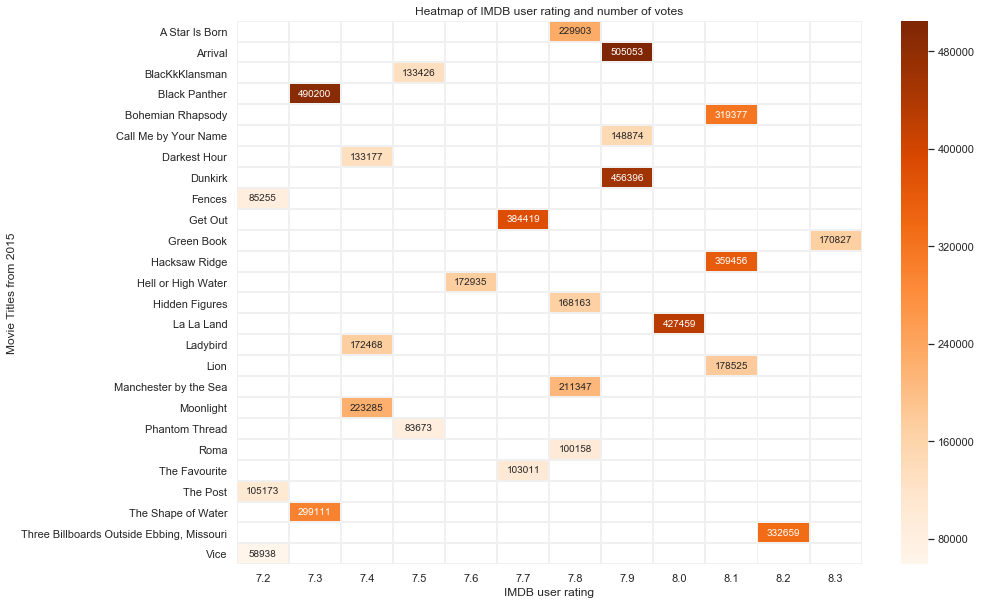

In [9]:
df_imdb = df.loc[df['year'] > 2015]
df_imdb = df_imdb.pivot('title','IMDBRating','imdb_numVotes')

fig1, display_imdb = plt.subplots(figsize=(14,10))
fig1=sns.heatmap(df_imdb, fmt=".0f", annot=True, cmap='Oranges', linewidths=1, linecolor='#f0f0f0')
display_imdb.set_xlabel("IMDB user rating")
display_imdb.set_ylabel("Movie Titles from 2015")
display_imdb.set_title("Heatmap of IMDB user rating and number of votes")

A very interesting detail from the above heatmap is that **La La Land** had higher vote count and rating than **Moonlight**. This makes sense, as we all know that the whole world was expecting La La Land to win the oscar but the academy had other things in mind.

**2. Heat Map for Rotten Tomatoes user rating and number of votes**<br>
The heatmap has nominees and winners from the year 2015, slicing is done in order to give a easier output for the user to interpret

Text(0.5, 1.0, 'Heatmap of Rotten Tomatoes user rating and number of votes')

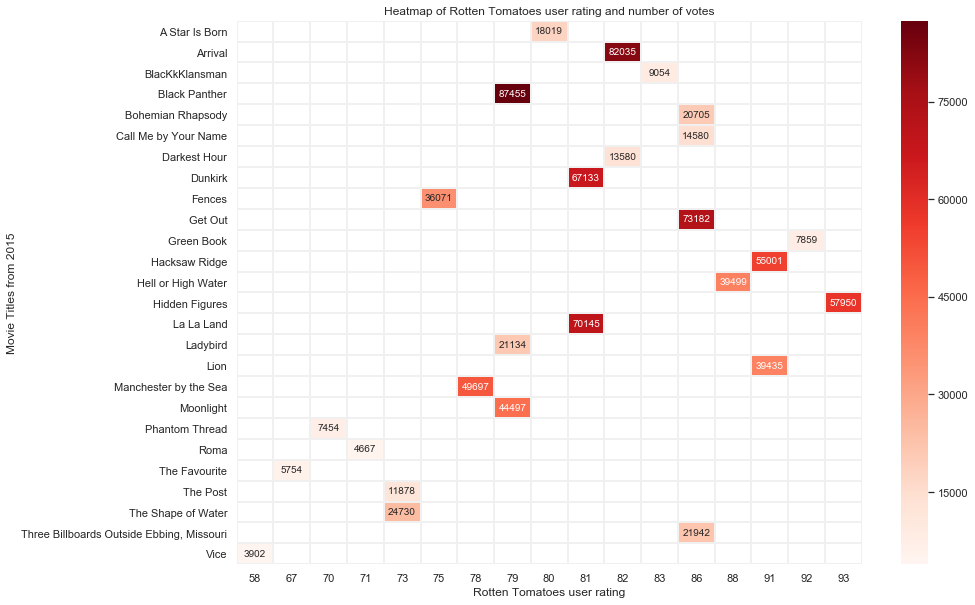

In [10]:
df_rotten_users = df.loc[df['year'] > 2015]
df_rotten_users = df_rotten_users.pivot('title','RottenRating','rotten_numVotes')

fig2, display_rotten_users = plt.subplots(figsize=(14,10))
fig2=sns.heatmap(df_rotten_users, fmt=".0f", annot=True, cmap='Reds', linewidths=1, linecolor='#f0f0f0')
display_rotten_users.set_xlabel("Rotten Tomatoes user rating")
display_rotten_users.set_ylabel("Movie Titles from 2015")
display_rotten_users.set_title("Heatmap of Rotten Tomatoes user rating and number of votes")

Let's look at our anomaly again, **La La Land** again wins in this round beating the actual winnner **Moonlight**. This is again expected behavior, La La Land being the crowd favorite surely had higher rating and vote count.

**3. Heat Map for Rotten Tomatoes critic rating and number of votes**<br>
The heatmap has nominees and winners from the year 2015, slicing is done in order to give a easier output for the user to interpret

Text(0.5, 1.0, 'Heatmap of Rotten Tomatoes critic rating and number of votes')

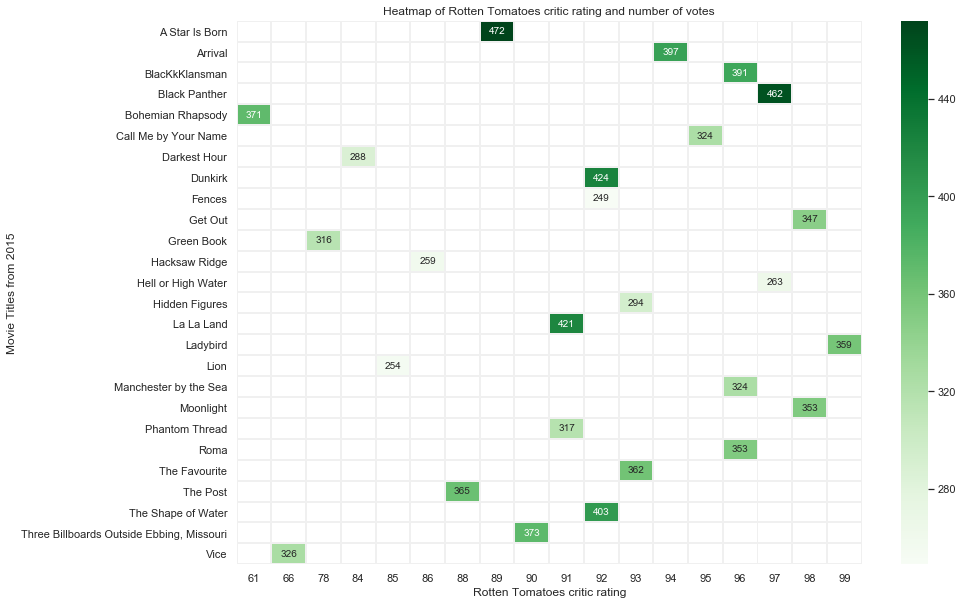

In [11]:
df_rotten_critics = df.loc[df['year'] > 2015]
df_rotten_critics = df_rotten_critics.pivot('title','RottenCriticRating','rottencritic_numVotes')

fig3, display_rotten_critics = plt.subplots(figsize=(14,10))
fig3=sns.heatmap(df_rotten_critics, fmt=".0f", annot=True, cmap='Greens', linewidths=1, linecolor='#f0f0f0')
display_rotten_critics.set_xlabel("Rotten Tomatoes critic rating")
display_rotten_critics.set_ylabel("Movie Titles from 2015")
display_rotten_critics.set_title("Heatmap of Rotten Tomatoes critic rating and number of votes")

This is where it gets interesting, though people loved **La La Land**, it was **Moonlight** that had the victory dance. The above heatmap helps us in understanding the reason behind it. We know critics in the academy cast votes depending on various factors that non-critics never really care about, this can be seen above where critic rating is more for Moonlight when compared with crowd favorite La La Land.

**4. Scatter Plot for Rotten Tomatoes critic rating and number of votes**<br>
The scatter plot has nominees and winners from the year 2015, slicing is done in order to give a easier output for the user to interpret

Text(0.5, 1.0, 'Scatter plot of MovieLens user rating')

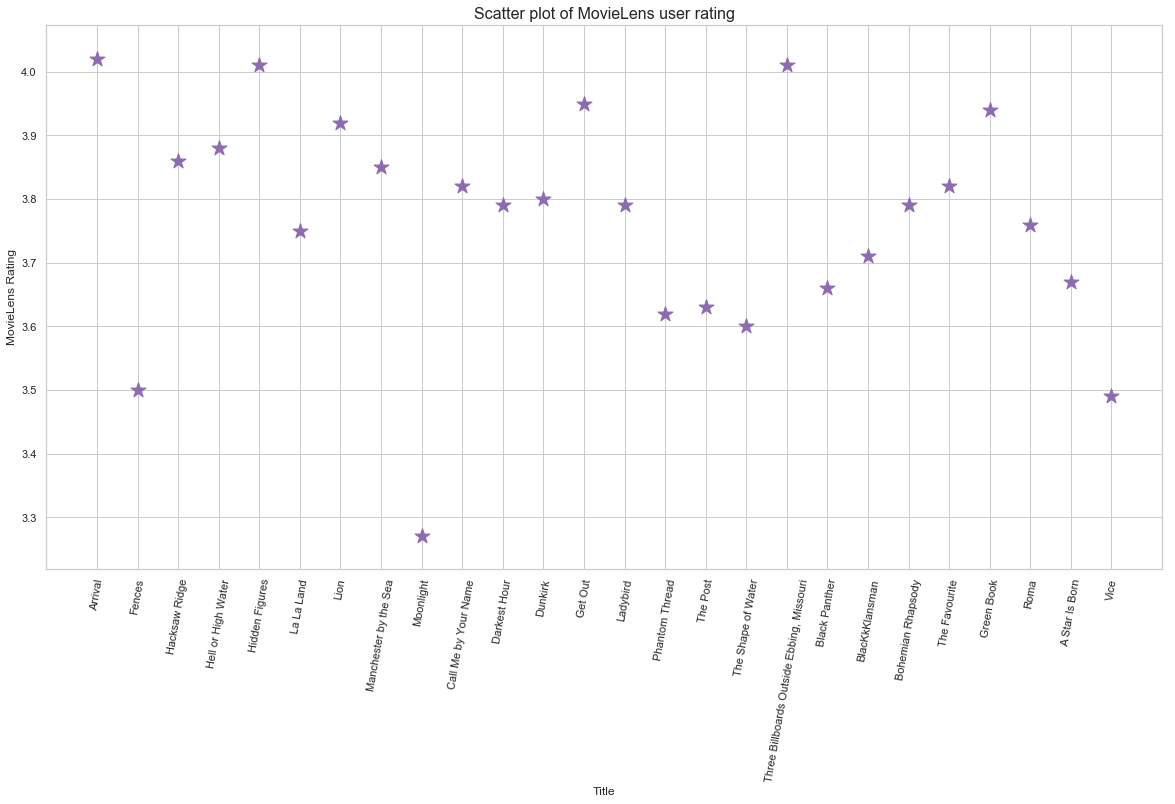

In [12]:
df_movielens = df.loc[df['year'] > 2015]

fig4, display_movielens = plt.subplots(figsize=(20,10))
fig4 = plt.scatter(df_movielens['title'], df_movielens['MovieLensrating'], marker='*', c = "#8c6bb1", s = 250)
display_movielens.set_xticklabels(df_movielens['title'], rotation = 80)
display_movielens.set_xlabel("Title", fontsize=12)
display_movielens.set_ylabel("MovieLens Rating", fontsize=12)
display_movielens.set_title("Scatter plot of MovieLens user rating", fontsize=16)

Since MovieLens data is collected from users, the anomaly holds good. **La La Land** has a higher rating when compared to **Moonlight**

**Which genre has more Oscars?** 

To answer this question, we will break the genre column into multiple columns as one movie can have multiple genre themes. After this we will dynamically check each genre and check which genre has a higher winning percentage compared to the others.

In [13]:
df_genres = df.set_index('title')['genres'].str.get_dummies('|')
df_genres = df_genres.reset_index()
df_genres['won_oscar'] = df['won_oscar']
df_genres['Adventure'] = df_genres['Adventure'] + df_genres['Adveture']
df_genres = df_genres.drop('Adveture', axis=1)

Text(0.5, 1.0, 'Genres with Oscar Win & Lost')

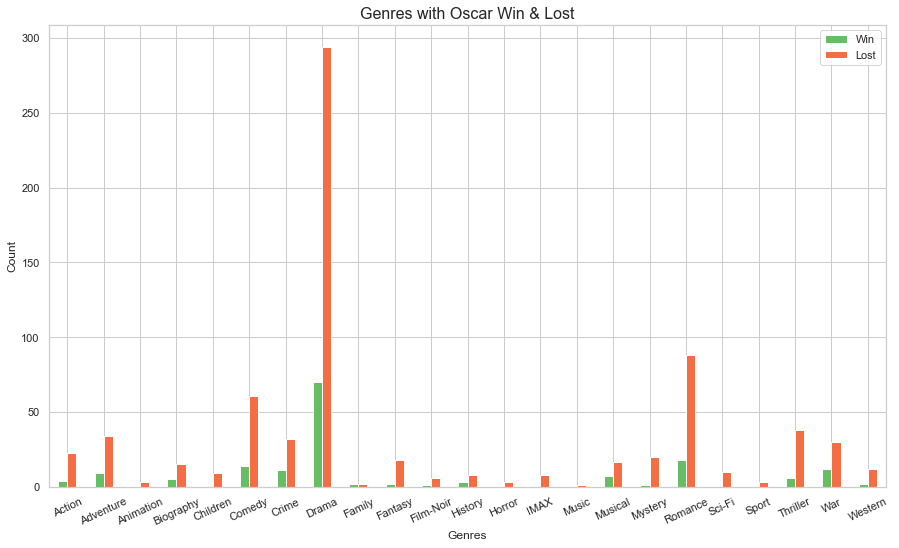

In [14]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Children',
         'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
         'Horror', 'IMAX', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
         'Sport', 'Thriller', 'War', 'Western']

df_filtered_genres = df_genres[['Action', 'Adventure', 'Animation', 'Biography', 'Children',
                                     'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
                                     'Horror', 'IMAX', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                                     'Sport', 'Thriller', 'War', 'Western', 'won_oscar']]

zero = np.zeros(shape=(23,2))
df_count = pd.DataFrame(zero, columns=['Win', 'Lost'], index = genres)

for genre in genres:
    temp = df_filtered_genres[df_filtered_genres[genre] == 1]

    total = temp.shape[0]
    x = temp.groupby('won_oscar')['won_oscar'].count()
    df_count.loc[genre, 'Lost'] = x[0] if x[0] else 0
    df_count.loc[genre, 'Win'] = (total - x[0])

df_t = df_count.T

ax = pd.concat([df_t.loc['Win'], df_t.loc['Lost']],axis=1).plot(kind = 'bar', figsize=(15,8.5), color = ("#66bd63","#f46d43"))
ax.set_xticklabels(genres, rotation = 25)
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Genres with Oscar Win & Lost", fontsize=16)

Most often stats show that Drama movies win Oscars. But when we look at the above diagram, where we try to match all genres with the movies we tend to see the number of movies that fall under Drama are high, maybe that's why stats ends up showing drama genre as a forerunner.

## 3.  Now let's analyze the Best Picture winners 

Let's fitler only the Oscar winners from our dataset

In [15]:
df_winners = df.loc[df['won_oscar'] == 1].reset_index()
df_winners.head()

,index,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
0,2,1944,BEST PICTURE,Going My Way,Comedy|Drama|Musical,3.56,126,7.2,9228,79,24,76,5748,0,0,0,0,0,0,1
1,7,1945,BEST PICTURE,The Lost Weekend,Drama|Film-Noir,3.89,101,8.0,30176,100,33,90,8800,0,0,0,0,0,0,1
2,10,1946,BEST PICTURE,The Best Years of Our Lives,Drama|Romance|War,4.05,170,8.1,52846,96,49,92,10761,0,0,0,0,0,0,1
3,17,1947,BEST PICTURE,Gentleman's Agreement,Drama,3.74,118,7.4,13157,78,37,77,5598,0,0,0,0,0,0,1
4,20,1948,BEST PICTURE,Hamlet,Drama,3.75,154,7.8,13761,91,34,81,7514,1,0,0,0,0,0,1


Let's look at the following ratings of the winners -
    1. IMDB user rating
    2. Rotten Tomatoes user rating
    3. Rotten Tomatoes critic rating

**1. Barchart from IMDB user rating**

Text(0.5, 1.0, 'IMBD user rating for each Best Picture winner')

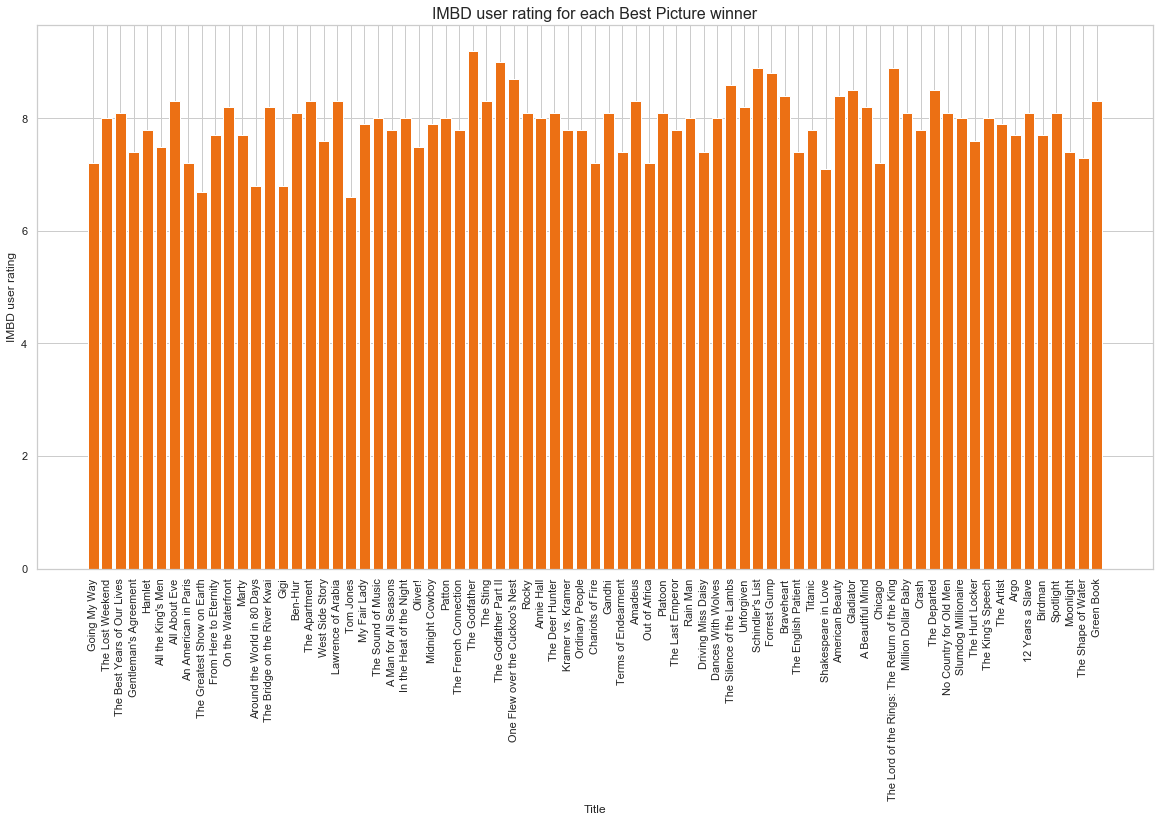

In [16]:
fig5, bar_imdb = plt.subplots(figsize=(20,10))
fig5 = plt.bar(df_winners['title'], df_winners['IMDBRating'], label='imdb rating', color = '#ec7014')
bar_imdb.set_xticklabels(df_winners['title'], rotation=90) 
bar_imdb.set_xlabel('Title', fontsize=12)
bar_imdb.set_ylabel('IMBD user rating', fontsize=12)
bar_imdb.set_title('IMBD user rating for each Best Picture winner', fontsize=16)

As expected, the ratings are soaring for all the Oscar Winners.

**2. Barchart from Rotten Tomatoes user rating**

Text(0.5, 1.0, 'Rotten Tomatoes user rating for each Best Picture winner')

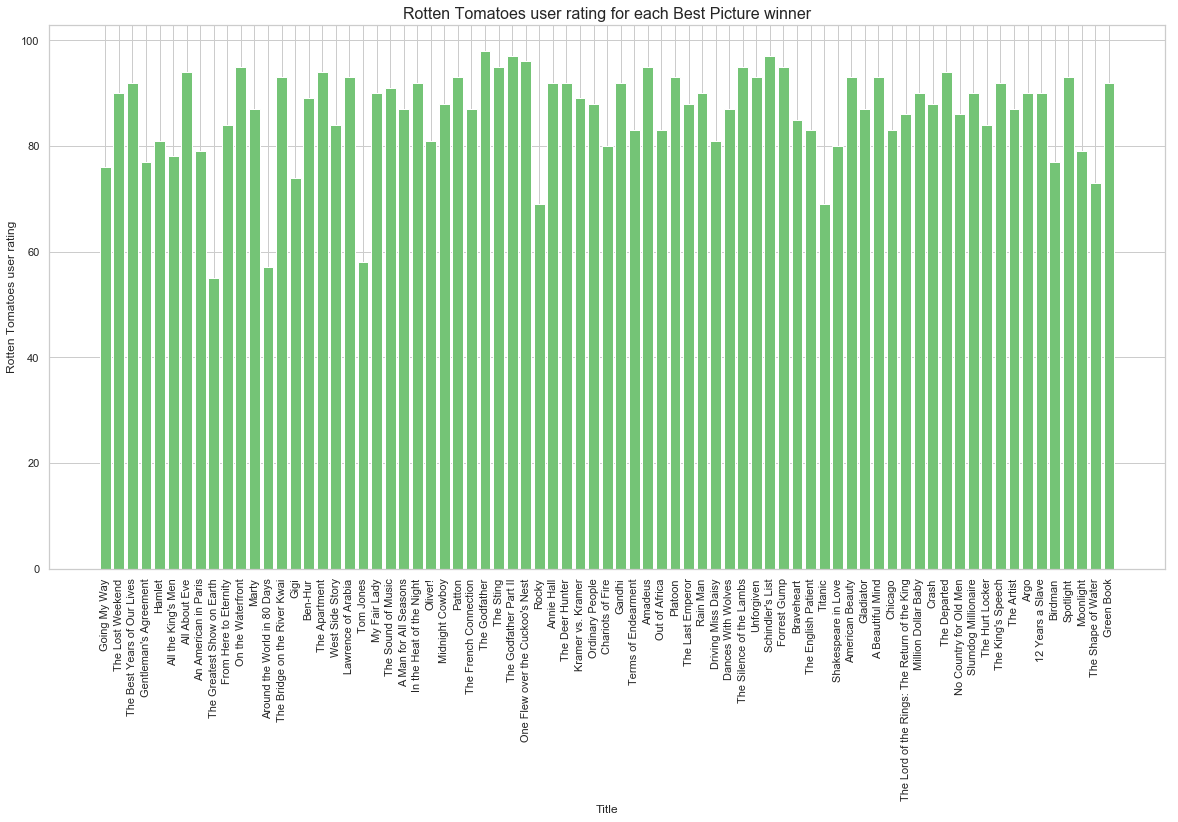

In [17]:
fig6, bar_rt_user = plt.subplots(figsize=(20,10))
fig6 = plt.bar(df_winners['title'], df_winners['RottenRating'], label='imdb rating', color = '#74c476')
bar_rt_user.set_xticklabels(df_winners['title'], rotation=90) 
bar_rt_user.set_xlabel('Title', fontsize=12)
bar_rt_user.set_ylabel('Rotten Tomatoes user rating', fontsize=12)
bar_rt_user.set_title('Rotten Tomatoes user rating for each Best Picture winner', fontsize=16)

There are a few movies with very low ratings comparatively, which is strange compared to the normal high numbers

**3. Barchart from Rotten Tomatoes critic rating**

Text(0.5, 1.0, 'Rotten Tomatoes critic rating for each Best Picture winner')

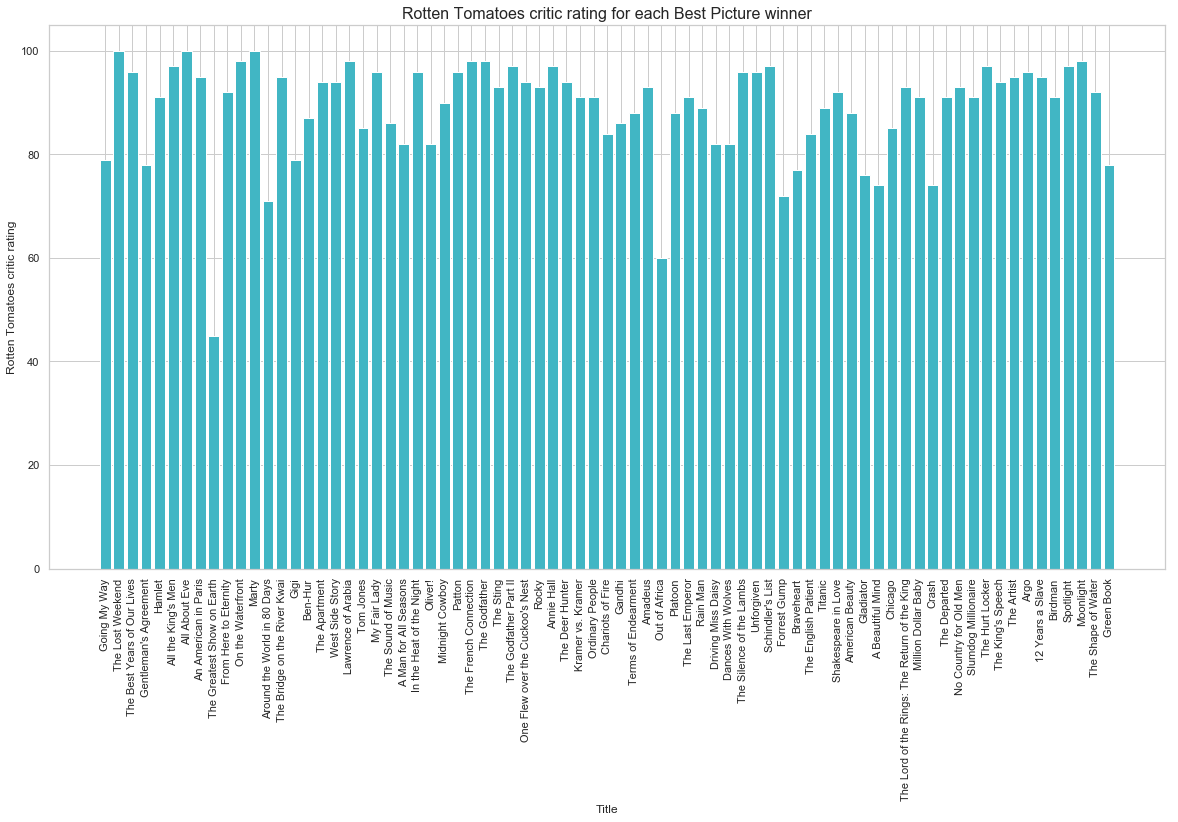

In [18]:
fig7, bar_rt_critic = plt.subplots(figsize=(20,10))
fig7 = plt.bar(df_winners['title'], df_winners['RottenCriticRating'], label='imdb rating', color = '#41b6c4')
bar_rt_critic.set_xticklabels(df_winners['title'], rotation=90) 
bar_rt_critic.set_xlabel('Title', fontsize=12)
bar_rt_critic.set_ylabel('Rotten Tomatoes critic rating', fontsize=12)
bar_rt_critic.set_title('Rotten Tomatoes critic rating for each Best Picture winner', fontsize=16)

We see a few movies with really low rating, this could be because of the number of votes being a lower number.

## Conclusion

Through exploratory analysis we were able to establish the behavior of the features and how to interpret the values in our features. The plots and visuals only helped in rooting the anomalies expected and helped in better understanding of the dataset